# CapstoneProject

In [1]:
# importing necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
%matplotlib inline

In [2]:
#loading the dataset as dataframe
house = pd.read_csv("innercity.csv")
house

,cid,dayhours,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,...,basement,yr_built,yr_renovated,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area
0,3034200666,20141107T000000,808100,4,3.25,3020,13457,1.0,0,0,...,0,1956,0,98133,47.7174,-122.336,2120,7553,1,16477
1,8731981640,20141204T000000,277500,4,2.50,2550,7500,1.0,0,0,...,800,1976,0,98023,47.3165,-122.386,2260,8800,0,10050
2,5104530220,20150420T000000,404000,3,2.50,2370,4324,2.0,0,0,...,0,2006,0,98038,47.3515,-121.999,2370,4348,0,6694
3,6145600285,20140529T000000,300000,2,1.00,820,3844,1.0,0,0,...,0,1916,0,98133,47.7049,-122.349,1520,3844,0,4664
4,8924100111,20150424T000000,699000,2,1.50,1400,4050,1.0,0,0,...,0,1954,0,98115,47.6768,-122.269,1900,5940,0,5450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,5137800030,20140701T000000,300000,4,2.50,2303,3826,2.0,0,0,...,0,2006,0,98092,47.3258,-122.165,2516,4500,0,6129
21609,8562890910,20140619T000000,320000,4,2.50,3490,5000,2.0,0,0,...,0,2003,0,98042,47.3772,-122.127,2910,5025,0,8490
21610,1442880160,20140627T000000,483453,4,2.75,2790,5527,2.0,0,0,...,0,2014,0,98045,47.4827,-121.773,2620,5509,0,8317
21611,622100130,20140917T000000,365000,2,2.00,1440,15000,1.0,0,0,...,0,1985,0,98072,47.7648,-122.159,1780,15000,0,16440


In [3]:
# We have 21613 number of rows and 23 attributes or columns.
house.shape

(21613, 23)

In [4]:
house.isnull().sum()
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cid               21613 non-null  int64  
 1   dayhours          21613 non-null  object 
 2   price             21613 non-null  int64  
 3   room_bed          21613 non-null  int64  
 4   room_bath         21613 non-null  float64
 5   living_measure    21613 non-null  int64  
 6   lot_measure       21613 non-null  int64  
 7   ceil              21613 non-null  float64
 8   coast             21613 non-null  int64  
 9   sight             21613 non-null  int64  
 10  condition         21613 non-null  int64  
 11  quality           21613 non-null  int64  
 12  ceil_measure      21613 non-null  int64  
 13  basement          21613 non-null  int64  
 14  yr_built          21613 non-null  int64  
 15  yr_renovated      21613 non-null  int64  
 16  zipcode           21613 non-null  int64 

In [5]:
# below are the discrete attribute as these column contain certain values

house.sight.value_counts()
house.room_bed.value_counts()
house.room_bath.value_counts()
house.ceil.value_counts()
house.condition.value_counts()
house.quality.value_counts()
house.furnished.value_counts()

0    17362
1     4251
Name: furnished, dtype: int64

In [6]:
# room_bed is a discrete column
house.room_bed.value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
8       13
0       13
9        6
10       3
11       1
33       1
Name: room_bed, dtype: int64

In [7]:
# room_bath attribute shows discrete values 
house.room_bath.value_counts()

2.50    5380
1.00    3852
1.75    3048
2.25    2047
2.00    1930
1.50    1446
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      72
4.75      23
5.00      21
5.25      13
5.50      10
0.00      10
1.25       9
6.00       6
5.75       4
0.50       4
6.25       2
8.00       2
6.75       2
6.50       2
7.50       1
7.75       1
Name: room_bath, dtype: int64

In [8]:
house.ceil.value_counts()

1.0    10680
2.0     8241
1.5     1910
3.0      613
2.5      161
3.5        8
Name: ceil, dtype: int64

In [9]:
# 0 which has not a view to the water front
# 1 which has view to the waterfront since 20k houses wont be infront of coast 
house.coast.value_counts()

0    21450
1      163
Name: coast, dtype: int64

In [10]:
house.sight.value_counts()

0    19489
2      963
3      510
1      332
4      319
Name: sight, dtype: int64

In [11]:
house.condition.value_counts()

3    14031
4     5679
5     1701
2      172
1       30
Name: condition, dtype: int64

In [12]:
house.quality.value_counts()

7     8981
8     6068
9     2615
6     2038
10    1134
11     399
5      242
12      90
4       29
13      13
3        3
1        1
Name: quality, dtype: int64

In [13]:
house.ceil_measure.value_counts()

1300    212
1010    210
1200    206
1220    192
1140    184
       ... 
2665      1
2601      1
440       1
2473      1
1975      1
Name: ceil_measure, Length: 946, dtype: int64

In [14]:
house.basement.value_counts()

0       13126
600       221
700       218
500       214
800       206
        ...  
792         1
2590        1
935         1
2390        1
248         1
Name: basement, Length: 306, dtype: int64

In [15]:
print(house.yr_built.min())
print(house.yr_built.max())
range = house.yr_built.min() - house.yr_built.max()
print(range)
house["No_of_yrs_old"] = house.yr_built.max()- house["yr_built"] 
house.No_of_yrs_old.value_counts()

1900
2015
-115


1      559
9      454
10     450
11     433
12     422
      ... 
82      30
114     29
113     27
80      24
81      21
Name: No_of_yrs_old, Length: 116, dtype: int64

In [16]:
house[["yr_built","dayhours"]].head(8)

,yr_built,dayhours
0,1956,20141107T000000
1,1976,20141204T000000
2,2006,20150420T000000
3,1916,20140529T000000
4,1954,20150424T000000
5,1989,20140715T000000
6,1954,20141201T000000
7,1949,20140829T000000


In [17]:
house.furnished.value_counts()

0    17362
1     4251
Name: furnished, dtype: int64

In [18]:
house["yr_count_renovated_afterbuilt"] = house.yr_built.max()- house["yr_renovated"]
house.yr_count_renovated_afterbuilt.replace(to_replace=2015,value=0,inplace=True)
house.yr_count_renovated_afterbuilt.value_counts()

0     20715
1        91
2        37
12       36
15       35
      ...  
56        1
81        1
71        1
61        1
64        1
Name: yr_count_renovated_afterbuilt, Length: 69, dtype: int64

In [19]:
# we have removed the below listed columns because that wont affect the price prediction,it describes the house location etc
house1 = house.drop(["cid","dayhours","zipcode","lat","long","yr_built","yr_renovated"], axis=1)
house1

,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,condition,quality,ceil_measure,basement,living_measure15,lot_measure15,furnished,total_area,No_of_yrs_old,yr_count_renovated_afterbuilt
0,808100,4,3.25,3020,13457,1.0,0,0,5,9,3020,0,2120,7553,1,16477,59,0
1,277500,4,2.50,2550,7500,1.0,0,0,3,8,1750,800,2260,8800,0,10050,39,0
2,404000,3,2.50,2370,4324,2.0,0,0,3,8,2370,0,2370,4348,0,6694,9,0
3,300000,2,1.00,820,3844,1.0,0,0,4,6,820,0,1520,3844,0,4664,99,0
4,699000,2,1.50,1400,4050,1.0,0,0,4,8,1400,0,1900,5940,0,5450,61,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,300000,4,2.50,2303,3826,2.0,0,0,3,8,2303,0,2516,4500,0,6129,9,0
21609,320000,4,2.50,3490,5000,2.0,0,0,3,8,3490,0,2910,5025,0,8490,12,0
21610,483453,4,2.75,2790,5527,2.0,0,0,3,8,2790,0,2620,5509,0,8317,1,0
21611,365000,2,2.00,1440,15000,1.0,0,0,3,7,1440,0,1780,15000,0,16440,30,0


In [20]:
house1.shape

(21613, 18)

1.  we have removed the columns cid, dayhours, zipcode, lat, long, yr_built, yr_renovated but included No_of_yrs_old and yr_count_renovated_afterbuilt

2. There is no null values in the dataset

3. price is a dependent/target column and others are independent attributes

In [21]:
# this describe function gives us mean, std, min-max values and percentiles of each attributes.
house1.describe().T

,count,mean,std,min,25%,50%,75%,max
price,21613.0,540182.158793,367362.231718,75000.0,321950.00,450000.00,645000.0,7700000.0
room_bed,21613.0,3.370842,0.930062,0.0,3.00,3.00,4.0,33.0
room_bath,21613.0,2.114757,0.770163,0.0,1.75,2.25,2.5,8.0
living_measure,21613.0,2079.899736,918.440897,290.0,1427.00,1910.00,2550.0,13540.0
lot_measure,21613.0,15106.967566,41420.511515,520.0,5040.00,7618.00,10688.0,1651359.0
ceil,21613.0,1.494309,0.539989,1.0,1.00,1.50,2.0,3.5
coast,21613.0,0.007542,0.086517,0.0,0.00,0.00,0.0,1.0
sight,21613.0,0.234303,0.766318,0.0,0.00,0.00,0.0,4.0
condition,21613.0,3.409430,0.650743,1.0,3.00,3.00,4.0,5.0
quality,21613.0,7.656873,1.175459,1.0,7.00,7.00,8.0,13.0


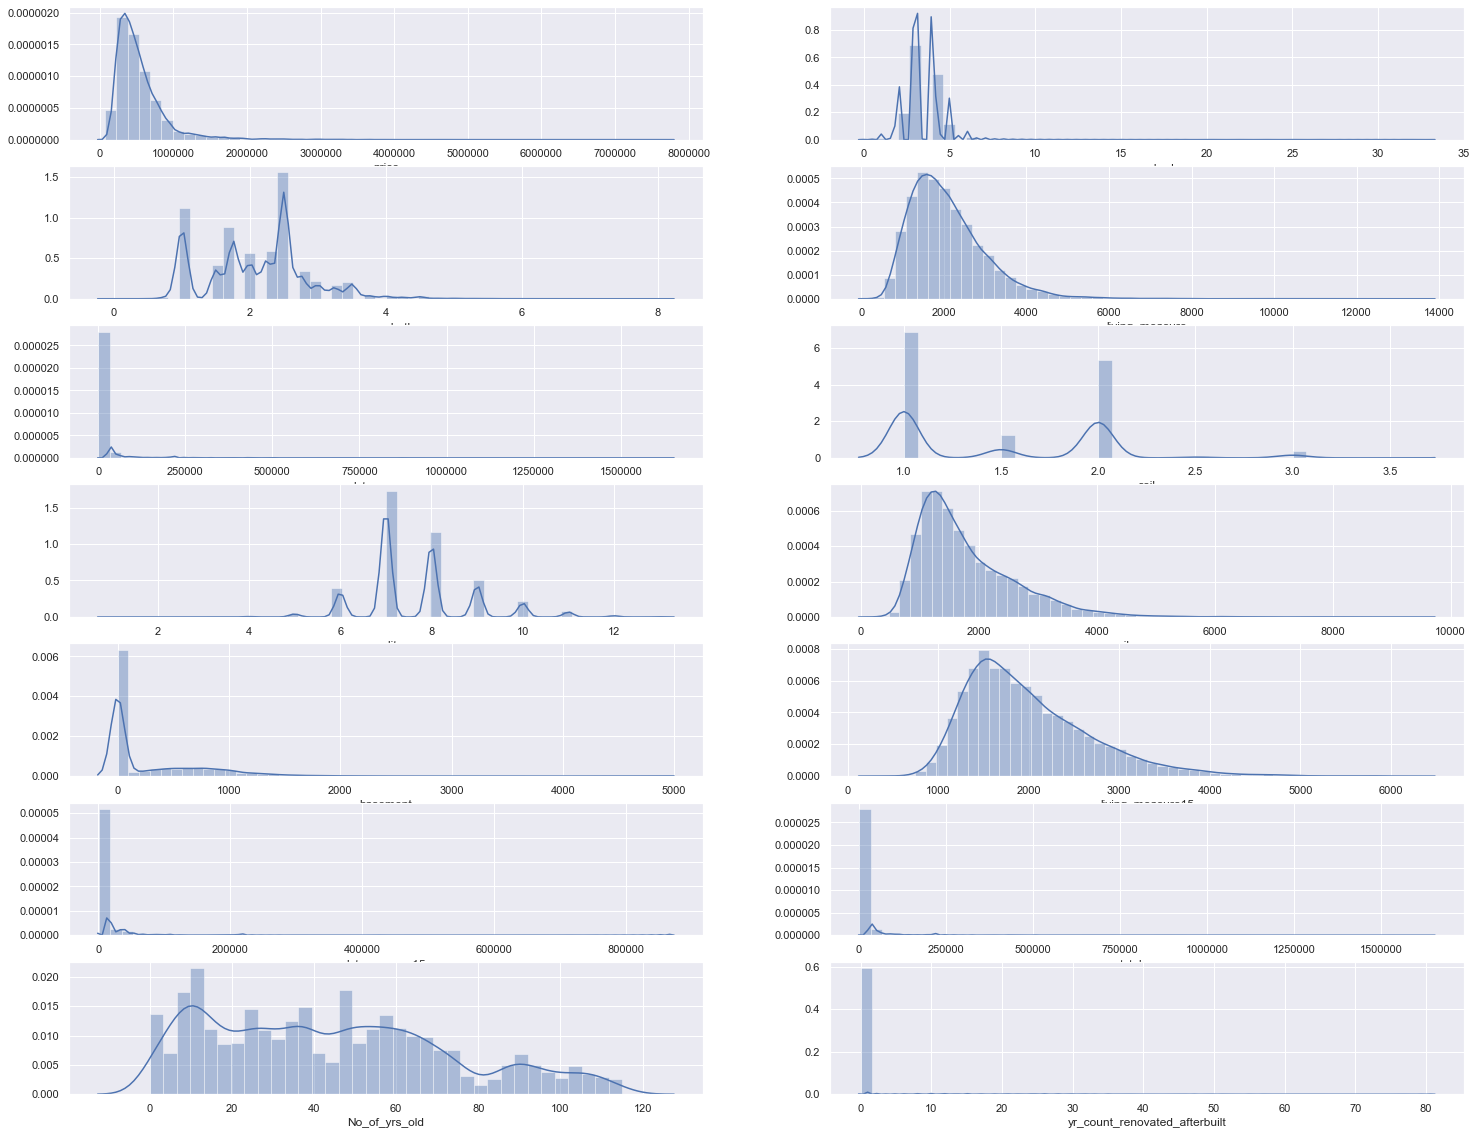

In [22]:
fig, ax= plt.subplots(7, 2, figsize=(25, 20))
sns.distplot(house1['price'],ax=ax[0][0])
sns.distplot(house1['room_bed'],ax=ax[0][1])
sns.distplot(house1['room_bath'],ax=ax[1][0])
sns.distplot(house1['living_measure'],ax=ax[1][1])
sns.distplot(house1['lot_measure'],ax=ax[2][0])
sns.distplot(house1['ceil'],ax=ax[2][1])
sns.distplot(house1['quality'],ax=ax[3][0])
sns.distplot(house1['ceil_measure'],ax=ax[3][1])
sns.distplot(house1['basement'],ax=ax[4][0])
sns.distplot(house1['living_measure15'],ax=ax[4][1])
sns.distplot(house1['lot_measure15'],ax=ax[5][0])
sns.distplot(house1['total_area'],ax=ax[5][1])
sns.distplot(house1['No_of_yrs_old'],ax=ax[6][0])
sns.distplot(house1['yr_count_renovated_afterbuilt'],kde_kws={'bw': 0.1},ax=ax[6][1])

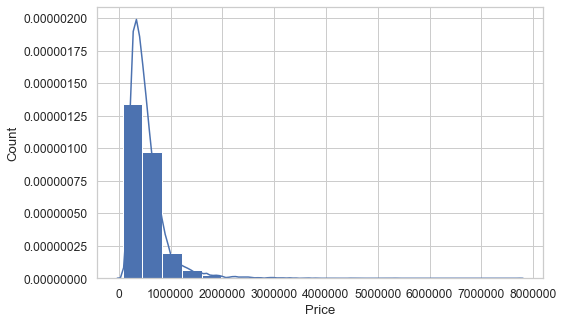

In [45]:
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.distplot(house1['price'], norm_hist=False, kde=True, bins=20, hist_kws={"alpha": 1}).set(xlabel='Price', ylabel='Count');

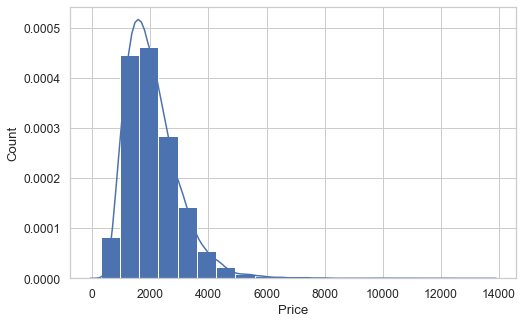

In [59]:
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.distplot(house1['living_measure'], norm_hist=False, kde=True, bins=20, hist_kws={"alpha": 1}).set(xlabel='Price', ylabel='Count');

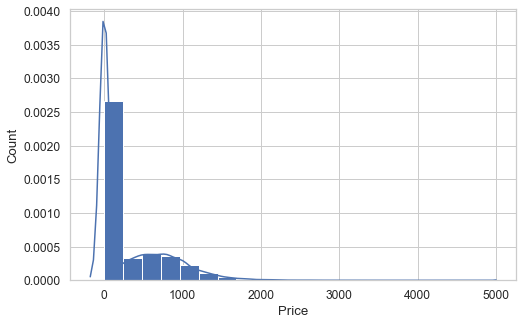

In [60]:
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.distplot(house1['basement'], norm_hist=False, kde=True, bins=20, hist_kws={"alpha": 1}).set(xlabel='Price', ylabel='Count');

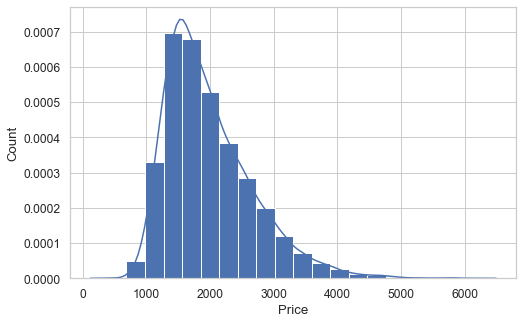

In [61]:
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.distplot(house1['living_measure15'], norm_hist=False, kde=True, bins=20, hist_kws={"alpha": 1}).set(xlabel='Price', ylabel='Count');

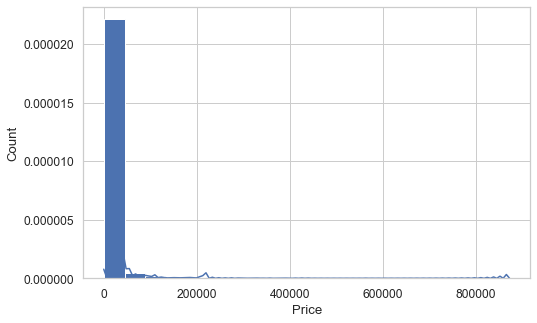

In [63]:
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.distplot(house1['lot_measure15'], norm_hist=False, kde=True, bins=20, hist_kws={"alpha": 1}).set(xlabel='Price', ylabel='Count');

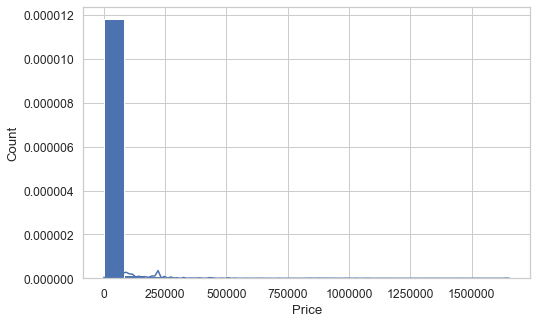

In [64]:
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.distplot(house1['total_area'], norm_hist=False, kde=True, bins=20, hist_kws={"alpha": 1}).set(xlabel='Price', ylabel='Count');

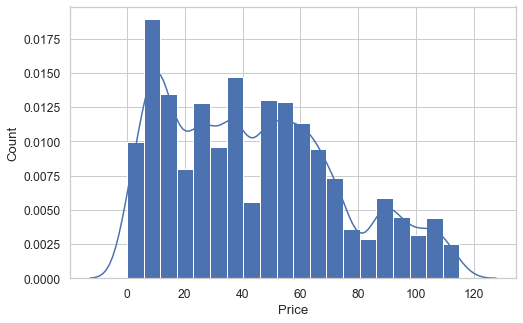

In [65]:
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.distplot(house1['No_of_yrs_old'], norm_hist=False, kde=True, bins=20, hist_kws={"alpha": 1}).set(xlabel='Price', ylabel='Count');

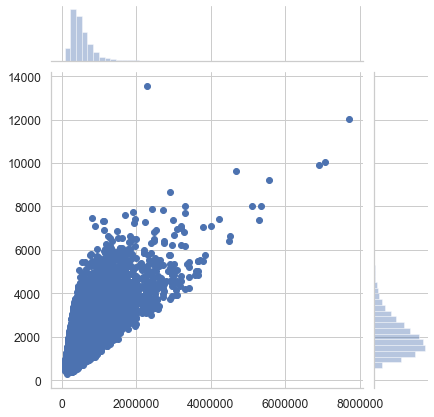

In [52]:
# attributes of price and living_measure have positive correlation
sns.jointplot([house1.price],[house1.living_measure], kind='scatter');

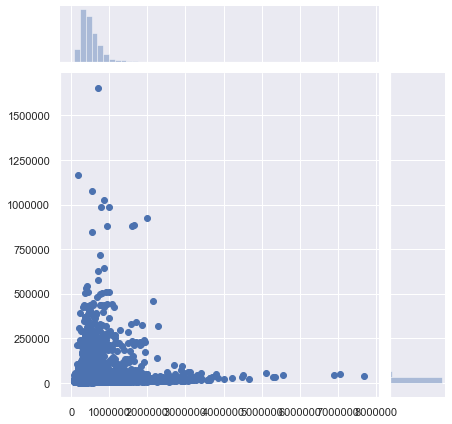

In [31]:
sns.jointplot([house1.price],[house1.total_area], kind='scatter');

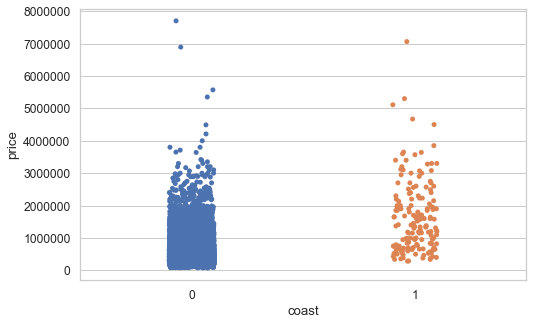

In [51]:
# we have categorical variables coast and furnished.
sns.stripplot(house1["coast"],house1["price"], jitter=True);

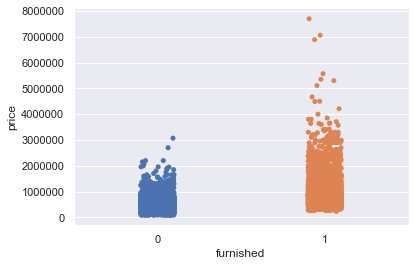

In [33]:
sns.stripplot(house1["furnished"],house1["price"], jitter=True);

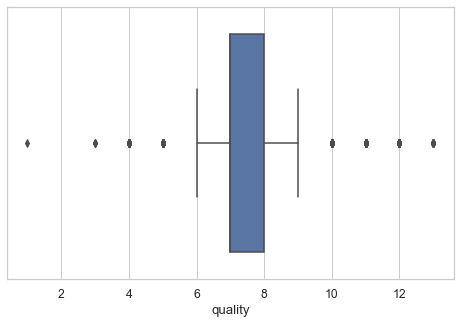

In [49]:
# we have attributes quality, price, room_bed,total_area have outliers present.
sns.boxplot(house1["quality"]);

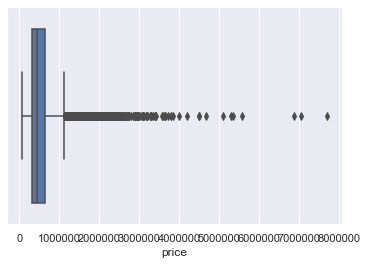

In [37]:
sns.boxplot(house1["price"]);

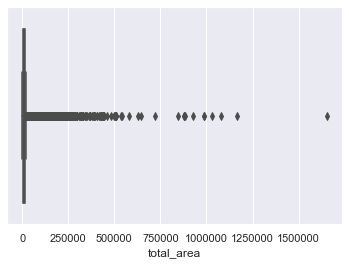

In [41]:
house1.total_area
sns.boxplot(house1["total_area"]);

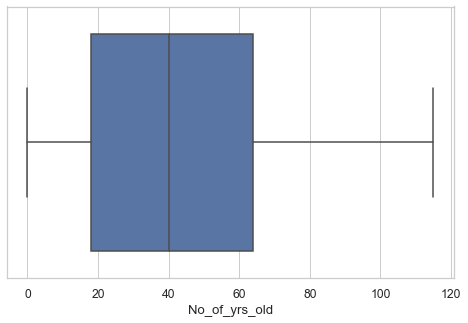

In [46]:
sns.boxplot(house1["No_of_yrs_old"]);

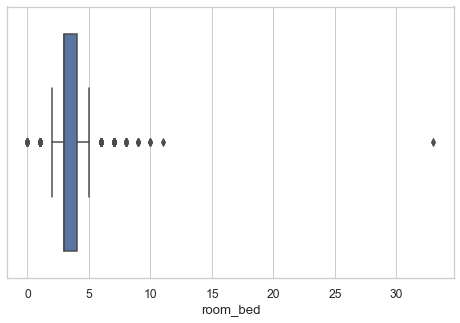

In [47]:
sns.boxplot(house1["room_bed"]);

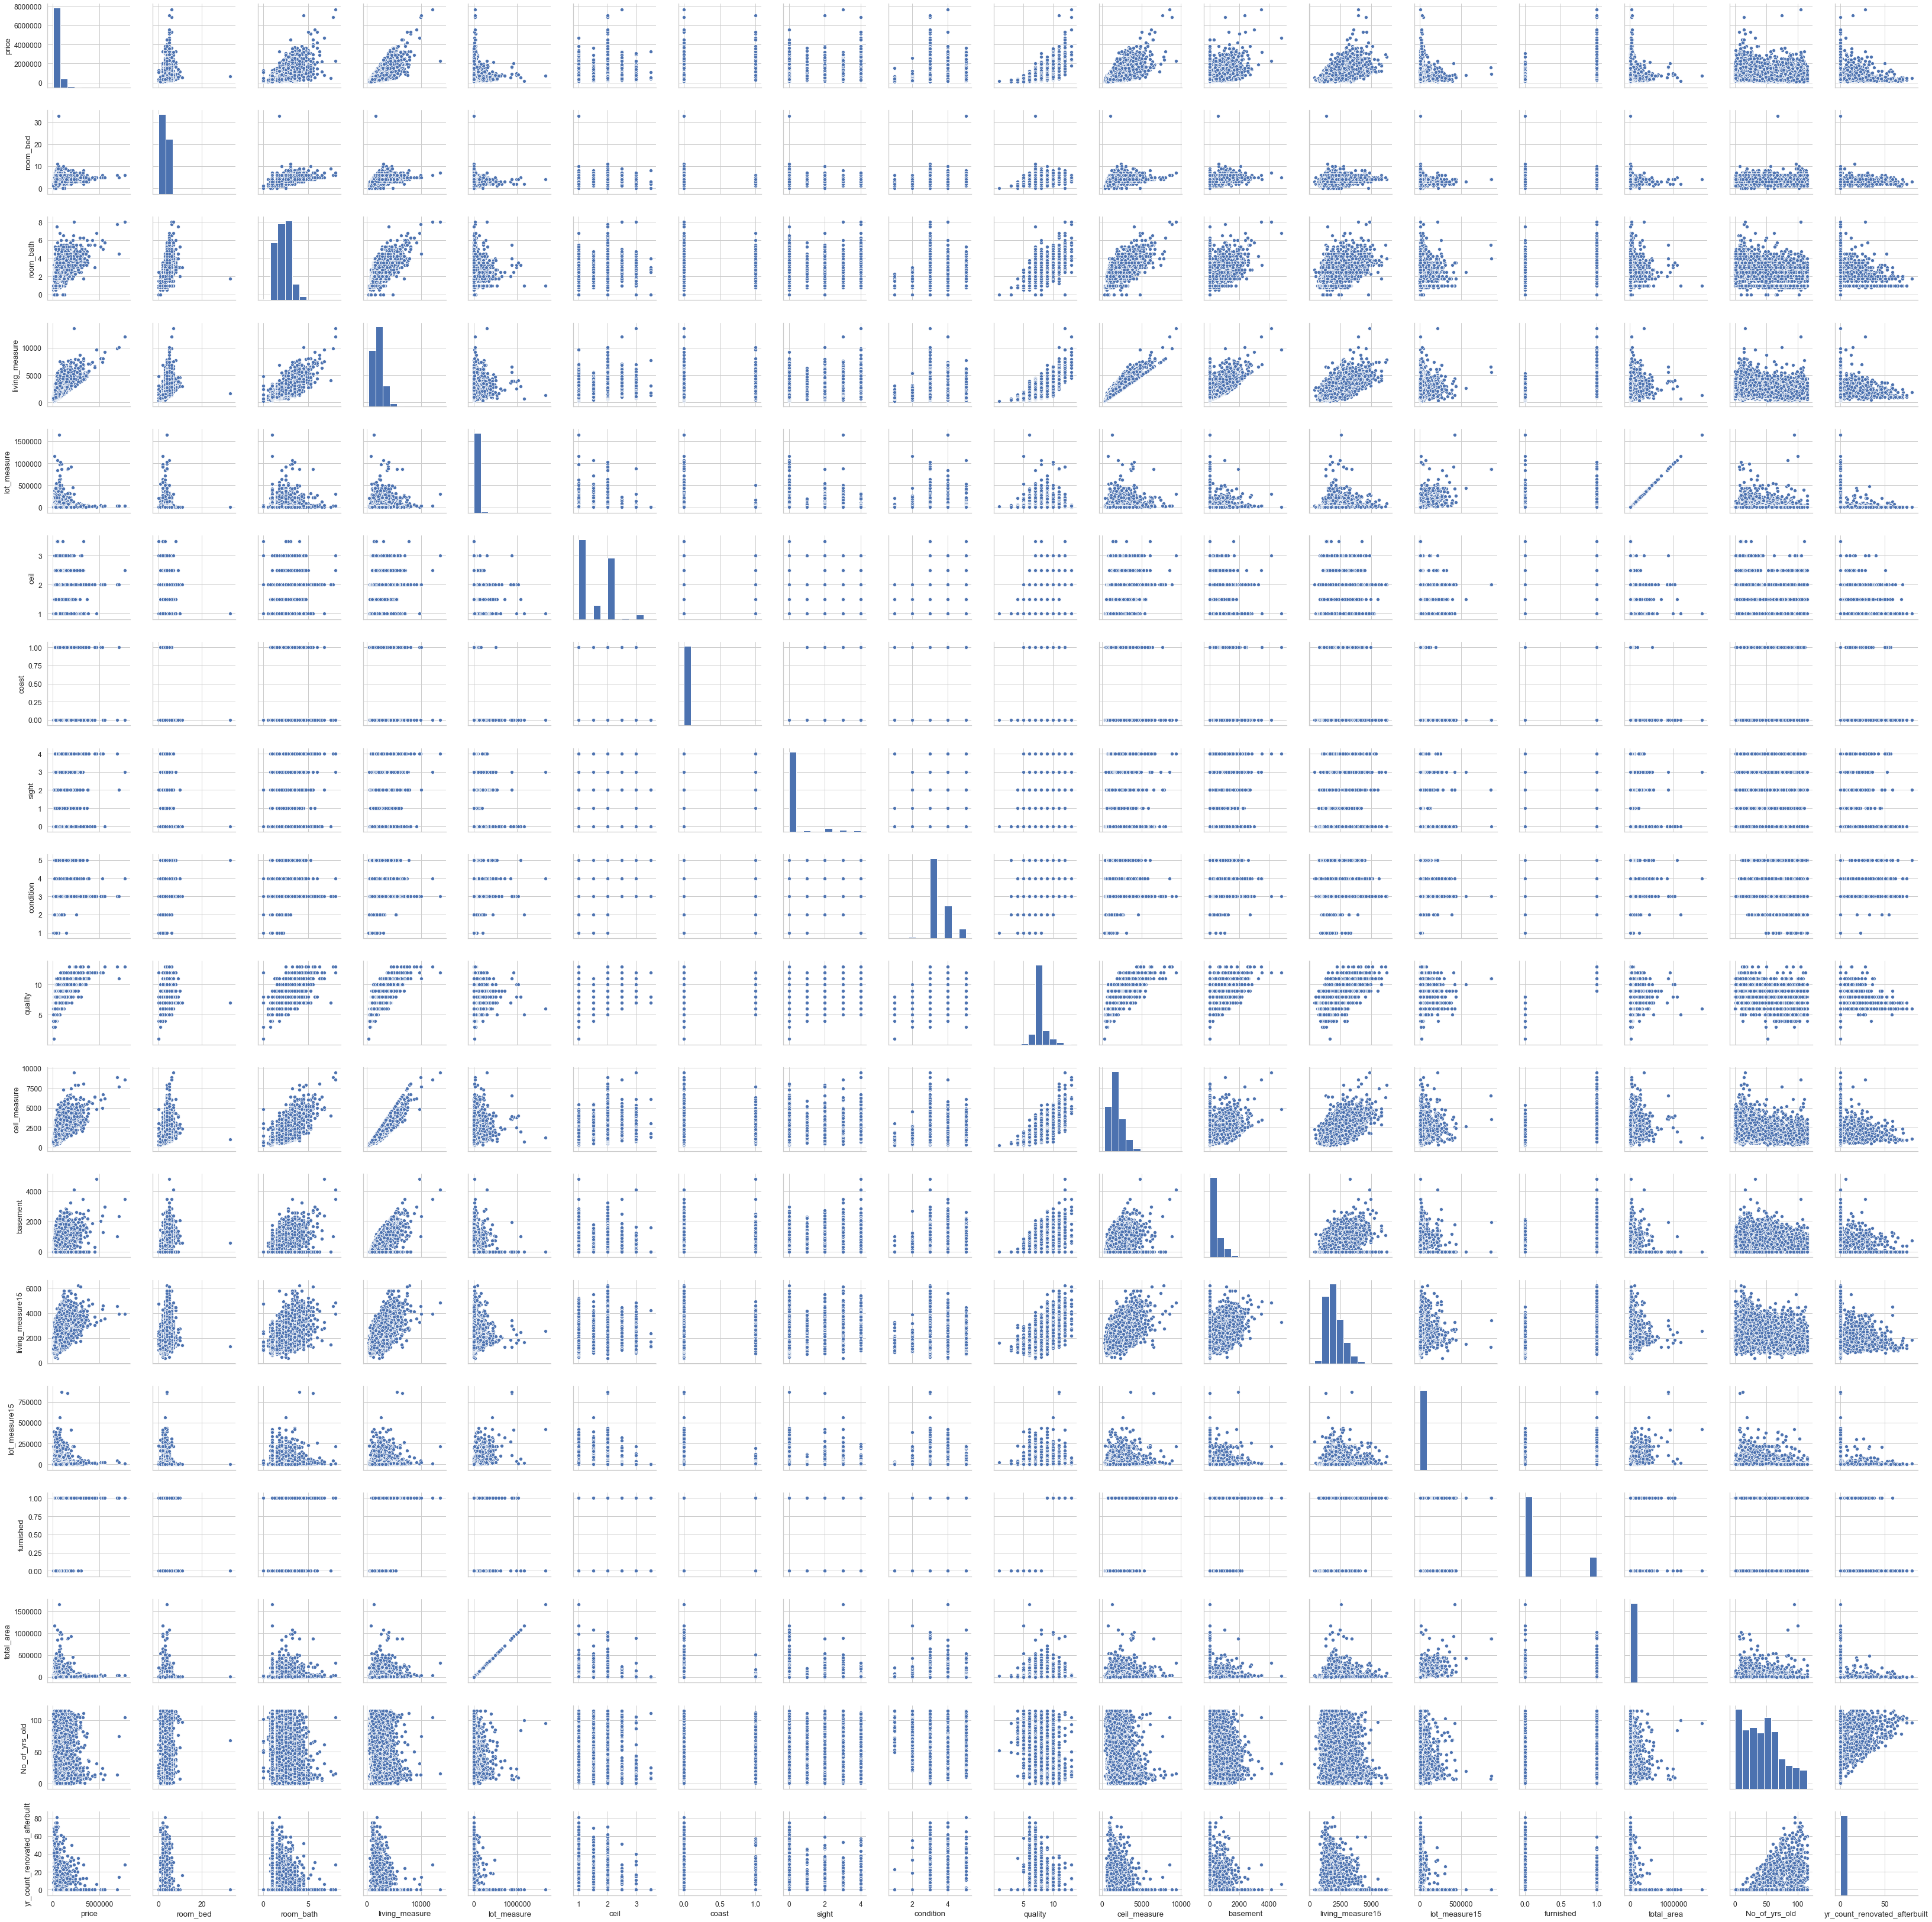

In [58]:
sns.pairplot(house1);

In [57]:
# attributes with living_measure, ceil_measure, quality have strong positive correlation
house1.corr()

,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,condition,quality,ceil_measure,basement,living_measure15,lot_measure15,furnished,total_area,No_of_yrs_old,yr_count_renovated_afterbuilt
price,1.000000,0.308338,0.525134,0.702044,0.089655,0.256786,0.266331,0.397346,0.036392,0.667463,0.605566,0.323837,0.585374,0.082456,0.565991,0.104796,-0.053982,0.069472
room_bed,0.308338,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.391638,0.029244,0.259268,0.044310,-0.154178,-0.008871
room_bath,0.525134,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.568634,0.087175,0.484923,0.104050,-0.506019,0.000186
living_measure,0.702044,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.756420,0.183286,0.632947,0.194209,-0.318049,0.020732
lot_measure,0.089655,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.144608,0.718557,0.118883,0.999763,-0.053080,0.014116
ceil,0.256786,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.279885,-0.011269,0.347749,0.002637,-0.489319,-0.001519
coast,0.266331,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,0.086463,0.030703,0.069882,0.023809,0.026161,0.104466
sight,0.397346,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,0.280439,0.072575,0.220250,0.080693,0.053440,0.091535
condition,0.036392,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.092824,-0.003406,-0.121902,-0.010219,0.361417,-0.007824
quality,0.667463,0.356967,0.664983,0.762704,0.113621,0.458183,0.082775,0.251321,-0.144674,1.000000,0.755923,0.168392,0.713202,0.119248,0.788621,0.130004,-0.446963,-0.021837
